In [392]:
import sys
import argparse
import random
import numpy as np 
import time
import math
sys.setrecursionlimit(3000)
import matplotlib.pyplot as plt
import random

In [393]:
# first command line argument is the array size
array_size = 10000

# read the value of k (i.e we are looking for the k-th smallest value in the array)
k = 22

# fill the array with random values
my_array = [random.randint(1,100*array_size) for _ in range(array_size)]

In [394]:
def shortest(a):
    min_val = min([len(i) for i in a if len(i)!=0])
    return [i for i in a if len(i)==min_val][0]

In [395]:
# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k) :
    # sort the array
    #print(k)
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k]

In [396]:
def deterministic_select(current_array, k,m=5) :
    #print(current_array)
    if (len(current_array) <= 5) :
        # just use any method to pick the k-th smallest element in the array
        # I am using the sort-and-select method here
        
        return sort_and_select(current_array, k)
    else : 
        # I need this array to compute the median-of-medians...
        medians_of_smaller_arrays_of_size_five = []
        
        # first, split current_array into smaller arrays with 5 elements each
        # there might be a better way than what I am doing... but this will work... 
        for i in range(0,len(current_array),m):
            #print(i)
            try:
                smaller_array_of_size_five = current_array[i:i+m]
            except IndexError:
                smaller_array_of_size_five = current_array[i:]
    
            #print(smaller_array_of_size_five)
            # we need each of these cases as len(smaller_array_of_size_five) can be anything between 1 and 5
            # based on len(smaller_array_of_size_five) we are computing the median of smaller_array_of_size_five for each case
            length = len(smaller_array_of_size_five)
            #print(length)
            check = length%2==0
            if length==1:
                medians_of_smaller_arrays_of_size_five.extend([smaller_array_of_size_five[0]])
            elif length == 2:
                medians_of_smaller_arrays_of_size_five.extend([np.mean(smaller_array_of_size_five)])
            else:
                if check:
                    first = deterministic_select(smaller_array_of_size_five,int(length/2))
                    second = deterministic_select(smaller_array_of_size_five,int((length/2)+1))
                    medians_of_smaller_arrays_of_size_five.extend([(first+second)/2])
                else:
                    k1 = length//2 + 1
                    #print(length)
                    #print(k1)
                    medians_of_smaller_arrays_of_size_five.extend([deterministic_select(smaller_array_of_size_five,k1)])
            

        # compute the meadian of the medians_of_smaller_arrays_of_size_five array by recursion
        p = deterministic_select(medians_of_smaller_arrays_of_size_five, int(len(medians_of_smaller_arrays_of_size_five)/2))
        # split the current_array into three sub-arrays: Less_than_p, Equal_to_p and Greater_than_p
        Less_than_p = []
        Equal_to_p = []
        Greater_than_p = []
        for x in current_array : 
            if (x < p) : 
                Less_than_p.extend([x])
            if (x == p) : 
                Equal_to_p.extend([x])
            if (x > p) : 
                Greater_than_p.extend([x])
                
        if (k < len(Less_than_p)) :
            return deterministic_select(Less_than_p, k)
        elif (k >= len(Less_than_p) + len(Equal_to_p)) : 
            return deterministic_select(Greater_than_p, k - len(Less_than_p) - len(Equal_to_p))
        else :
            return p

In [397]:
def randomized_select_with_multipe_pivots (current_array, k, no_of_pivots):
    if (len(current_array) <= no_of_pivots) :
        return sort_and_select(current_array,k)
    #print(len(current_array),no_of_pivots)
    pivot_values = random.sample(current_array,no_of_pivots)

    check = []
    d = {}
    for pivot in pivot_values:
        less = [i for i in current_array if i < pivot]
        more = [i for i in current_array if i > pivot]
        equal = [i for i in current_array if i == pivot]
        d[str(less)] = k
        d[str(more)] = k - len(less) - len(equal)
        if k < (len(less)):
            check.append(less)
        elif k >= ((len(equal)+len(less))):
            check.append(more)
        else:
            return(equal[0])
    next_iter = shortest(check)
    return(randomized_select_with_multipe_pivots(next_iter,d[str(next_iter)],no_of_pivots))

In [398]:
print("Looking for the ", k, "-th smallest element in a ", len(my_array), "long array")

t0 = time.time()
sorted_my_array = np.sort(my_array)

t1 = time.time()

print ("Sort-and-Pick Method        : ", sort_and_select(my_array, k))
t2 = time.time()
print ("Randomized-Select Method : ", randomized_select_with_multipe_pivots(my_array,k,10))
t3 = time.time()

print ("It took ", t1-t0, "seconds for the Sort-and-Pick Method")
print ("It took ", t3-t2, "seconds for the Randomized-Select Method")

Looking for the  22 -th smallest element in a  10000 long array
Sort-and-Pick Method        :  1861
Randomized-Select Method :  1861
It took  0.0017409324645996094 seconds for the Sort-and-Pick Method
It took  0.022837162017822266 seconds for the Randomized-Select Method


#Pivots =  1 ; Mean-Regressor's slope =  9.351374059446318e-07 ; Std-Dev-Regressor's slope =  2.7636798360972033e-07
#Pivots =  2 ; Mean-Regressor's slope =  1.0725357379132542e-06 ; Std-Dev-Regressor's slope =  2.7402616671225803e-07
#Pivots =  3 ; Mean-Regressor's slope =  1.3389704305740608e-06 ; Std-Dev-Regressor's slope =  2.7303177095555234e-07
#Pivots =  4 ; Mean-Regressor's slope =  5.399943792331981e-07 ; Std-Dev-Regressor's slope =  -1.246147451325816e-06
#Pivots =  5 ; Mean-Regressor's slope =  2.007224620916904e-06 ; Std-Dev-Regressor's slope =  2.46553080987142e-07
#Pivots =  6 ; Mean-Regressor's slope =  2.24646994298608e-06 ; Std-Dev-Regressor's slope =  3.176892719976038e-07
#Pivots =  7 ; Mean-Regressor's slope =  2.699825820545328e-06 ; Std-Dev-Regressor's slope =  3.604609795366784e-07
#Pivots =  8 ; Mean-Regressor's slope =  3.0376962107470904e-06 ; Std-Dev-Regressor's slope =  3.323648477783307e-07
#Pivots =  9 ; Mean-Regressor's slope =  3.2915763902170828e-06 ; S

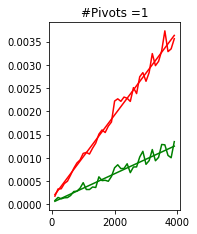

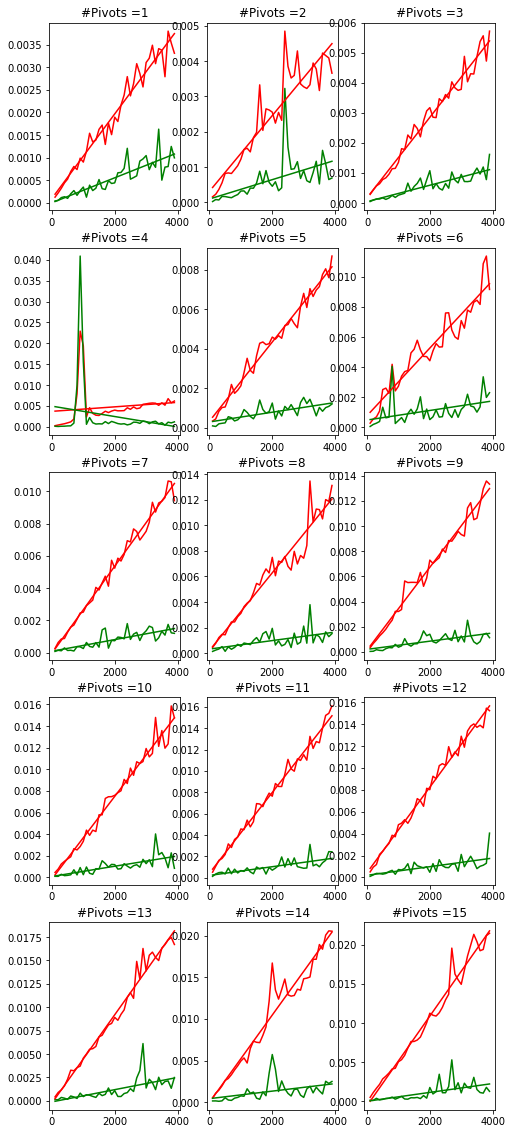

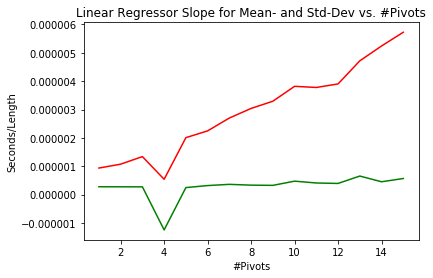

Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    =  3.496704001742624e-07
Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots =  4.397464564892582e-08


In [399]:
# Maximum #pivots
max_no_of_pivots = 15

# Number of Trials
number_of_trials = 10

# We are going to see if there is any observable difference in the slope of the Linear Regressor
# for the Mean (resp. Standard-Deviation) of the Running Time 
# and the slope of standard-deviation-regressor as the number of pivots are increased
slope_of_mean_regressor_as_a_function_of_no_of_pivots = []
slope_of_std_dev_regressor_as_a_function_of_no_of_pivots = []

# I am going to plot a lot of things
# I found the stuff here -- https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html
# to be useful. Instead, I just used what got from here to get the subplots not to get squished down -- 
# https://stackoverflow.com/questions/41530975/set-size-of-subplot-in-matplotlib
fig = plt.figure(figsize=(8, 20))

# try #pivots = 1,2,3,4 and see if having more pivots is helping with the run-time
for number_of_pivots in range(1, max_no_of_pivots+1) :
    
    # arrays containing mean- and std-dev of running time as a function of 
    # array size starting from 100 to 4000 in steps of 100
    mean_running_time = []
    std_dev_running_time = []
        
    # cycle through a bunch of array sizes, where "k" is randomly chosen
    for j in range(1, 40) :
        array_size = 100*j
        # let is pick k to be (close to) the median 
        k = math.ceil(array_size/2)
        # fill the array with random values
        my_array = [random.randint(1,100*array_size) for _ in range(array_size)]

        # run a bunch of random trials and get the algorithm's running time
        running_time = []
        for i in range(1, number_of_trials) :
            t1 = time.time()
            answer1 = randomized_select_with_multipe_pivots(my_array,k,number_of_pivots)
            t2 = time.time()
            running_time.extend([t2-t1])
            # uncomment the lines below to verify the solution of randomized_select_with_pivots
            #answer2 = sort_and_select(my_array, k)
            #if (answer1 != answer2) :
            #    print ("Something went wrong")
            #    exit()

        mean_running_time.extend([np.mean(running_time)])
        std_dev_running_time.extend([np.std(running_time)])

    # linear fit (cf. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html)
    t = np.arange(100, 4000, 100)
    z1 = np.polyfit(t, mean_running_time, 1)
    p1 = np.poly1d(z1)
    z2 = np.polyfit(t, std_dev_running_time, 1)
    p2 = np.poly1d(z2)
    
    print("#Pivots = ", number_of_pivots, "; Mean-Regressor's slope = ", z1[0], "; Std-Dev-Regressor's slope = ", z2[0])
    slope_of_mean_regressor_as_a_function_of_no_of_pivots.extend([z1[0]])
    slope_of_std_dev_regressor_as_a_function_of_no_of_pivots.extend([z2[0]])
    
    # plot the mean and standard deviation of the running-time as a function of array-size    
    axs = fig.add_subplot(5, 3, number_of_pivots)
    plt.plot(t, mean_running_time, 'r', t, std_dev_running_time, 'g', t, p1(t), 'r-', t, p2(t), 'g-')
    axs.set_title('#Pivots =' + str(number_of_pivots))

plt.savefig("fig2.pdf", bbox_inches='tight')
plt.show()
                                 
# plot the slope of the two regressors as a function of #pivots
x = [i for i in range(1, max_no_of_pivots+1)]
plt.plot(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 'r', x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 'g')
plt.title('Linear Regressor Slope for Mean- and Std-Dev vs. #Pivots')
plt.xlabel('#Pivots')
plt.ylabel('Seconds/Length')
plt.savefig("fig1.pdf", bbox_inches='tight')
plt.show()

# Checking if increasing the number of pivots is helping with the runtime in any significant manner... 
z3 = np.polyfit(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 1)
z4 = np.polyfit(x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 1)
print("Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    = ", z3[0])
print("Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots = ", z4[0])